Abstract

## Step 1: Understand the Problem
First, familiarize ourselves with the competition details. Our goal is to predict the sales price of houses based on various features provided in the dataset. The evaluation metric is the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

## Step 2: Get the Data
- Download the Data: Go to the competition's Data page and download the training and test datasets.
- Load the Data: Load the datasets into our environment using pandas.

In [24]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Step 3: Exploratory Data Analysis (EDA)
Perform an exploratory analysis to understand the data distribution, identify missing values, and discover potential relationships between features and the target variable (`SalePrice`).

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

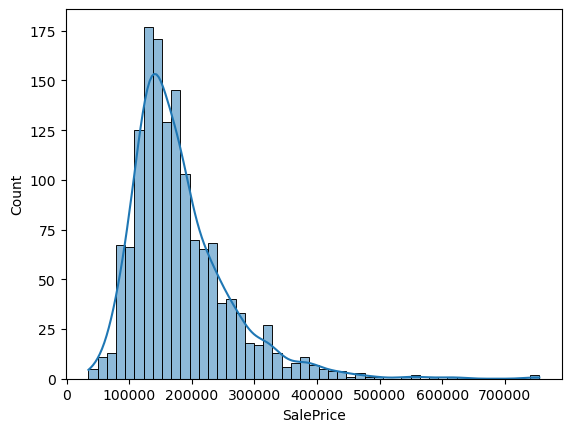

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the training set
print(train.head())

# Check for missing values
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Visualize the distribution of SalePrice
sns.histplot(train['SalePrice'], kde=True)
plt.show()


In [27]:
# train[['SalePrice']]

# test[['SalePrice']]

## Step 4: Feature Engineering
Create new features, handle missing values, and transform existing features to better represent the underlying data.

In [29]:
# # Example: Fill missing values for numerical features with the median
# for column in train.select_dtypes(include=['float64', 'int64']).columns:
#     train[column].fillna(train[column].median(), inplace=True)
#     test[column].fillna(test[column].median(), inplace=True)

# # Example: Convert categorical features using one-hot encoding
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)

# # Align the training and test sets by the columns
# train, test = train.align(test, join='left', axis=1)


# Fill missing values for numerical features with the median
for column in train.select_dtypes(include=['float64', 'int64']).columns:
    if column in test.columns:
        test[column] = test[column].fillna(test[column].median())
    train[column] = train[column].fillna(train[column].median())

# Convert categorical features using one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align the training and test sets by the columns
train, test = train.align(test, join='left', axis=1)

# If necessary, fill any remaining missing values (e.g., after alignment)
train = train.fillna(0)
test = test.fillna(0)

# Now your train and test sets are aligned and preprocessed
print(train.head())
print(test.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

## Step 5: Model Building
Use advanced regression techniques such as Random Forest, Gradient Boosting, and other ensemble methods.

In [31]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Split the training data
# X = train.drop('SalePrice', axis=1)
# y = train['SalePrice']

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train models
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# gb_model.fit(X_train, y_train)

# # Validate models
# rf_pred = rf_model.predict(X_valid)
# gb_pred = gb_model.predict(X_valid)

# rf_rmse = np.sqrt(mean_squared_error(y_valid, rf_pred))
# gb_rmse = np.sqrt(mean_squared_error(y_valid, gb_pred))

# print(f"Random Forest RMSE: {rf_rmse}")
# print(f"Gradient Boosting RMSE: {gb_rmse}")


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


# Fill missing values for numerical features with the median
for column in train.select_dtypes(include=['float64', 'int64']).columns:
    train[column].fillna(train[column].median(), inplace=True)
    if column in test.columns:
        test[column].fillna(test[column].median(), inplace=True)

# Convert categorical features using one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align the training and test sets by the columns
train, test = train.align(test, join='left', axis=1)

# Fill any remaining missing values with 0
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# Separate features and target
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate the models
rf_preds = rf_model.predict(X_valid)
gb_preds = gb_model.predict(X_valid)

print(f'Random Forest MAE: {mean_absolute_error(y_valid, rf_preds)}')
print(f'Gradient Boosting MAE: {mean_absolute_error(y_valid, gb_preds)}')

C:\Users\Nazm\AppData\Local\Temp\ipykernel_3992\3227204928.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].median(), inplace=True)
C:\Users\Nazm\AppData\Local\Temp\ipykernel_3992\3227204928.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Random Forest MAE: 17890.921746575343
Gradient Boosting MAE: 17199.2071892624


Let's rewrite the main part of the code and add it into `submission.csv` file

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Load the data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Preprocess training data
train['SalePrice'] = train['SalePrice'].fillna(train['SalePrice'].median())

# Fill missing values for numerical columns
for column in train.select_dtypes(include=['float64', 'int64']).columns:
    train[column].fillna(train[column].median(), inplace=True)

for column in test.select_dtypes(include=['float64', 'int64']).columns:
    test[column].fillna(test[column].median(), inplace=True)

# Convert categorical features using one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align the test set with the train set
train, test = train.align(test, join='left', axis=1)

# Drop 'SalePrice' from test set
test = test.drop('SalePrice', axis=1, errors='ignore')

# Fill any remaining NaN values in the test set with 0
test = test.fillna(0)

# Split the training data into features and target
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate the models
rf_preds = rf_model.predict(X_valid)
gb_preds = gb_model.predict(X_valid)

rf_mae = mean_absolute_error(y_valid, rf_preds)
gb_mae = mean_absolute_error(y_valid, gb_preds)

print(f'Random Forest MAE: {rf_mae}')
print(f'Gradient Boosting MAE: {gb_mae}')

# Use the Gradient Boosting model to make predictions on the test set
test_preds = gb_model.predict(test)

# Create the submission DataFrame
submission = pd.DataFrame({'Id': test.index + 1461, 'SalePrice': test_preds})

# Save the submission DataFrame to a CSV file
submission.to_csv('../data/submission.csv', index=False)


C:\Users\Nazm\AppData\Local\Temp\ipykernel_3992\3744224875.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].median(), inplace=True)
C:\Users\Nazm\AppData\Local\Temp\ipykernel_3992\3744224875.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Random Forest MAE: 17890.921746575343
Gradient Boosting MAE: 17199.2071892624


## Step 6: Model Tuning and Ensembling
Fine-tune the models and combine their predictions to improve performance.

In [35]:
from sklearn.model_selection import GridSearchCV

# Example: Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

# Ensemble predictions
ensemble_pred = (rf_model.predict(X_valid) + best_gb_model.predict(X_valid)) / 2
ensemble_rmse = np.sqrt(mean_squared_error(y_valid, ensemble_pred))

print(f"Ensemble RMSE: {ensemble_rmse}")


NameError: name 'mean_squared_error' is not defined